# List 6 summary

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
magnetization = np.load('results/magnetization.npy')

## Magnetization

Magnetization is a 5-D array with following dimensions: 

(p, q, graph, run, time)

In [4]:
ps = np.arange(0, 0.5, 0.02)

In [5]:
graphs = ["Complete graph",
          "Barabasi Albert (100, 4)",
          "Watts Strogatz (100, 4, 0.01)",
          "Watts Strogatz (100, 4, 0.2)"]
qs = [3, 4]

## Magnetization evolution in time on Watts-Strogatz graph

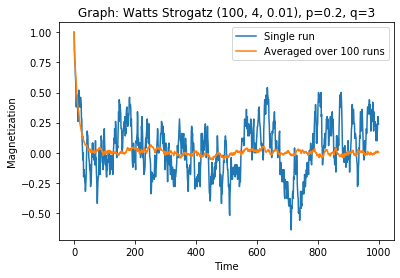

In [6]:
p_index = 10
q_index = 0
graph_index = 2
run_index = 0
plt.title('Graph: {}, p={}, q={}'.format(graphs[graph_index], ps[p_index], qs[q_index]))
plt.plot(magnetization[p_index, q_index, graph_index, run_index], label="Single run")
plt.plot(magnetization[p_index, q_index, graph_index].mean(axis=0), label="Averaged over 100 runs")
plt.xlabel('Time')
plt.ylabel('Magnetization')
plt.legend()
plt.show()

The figure below shows time evolution of magnetization in an exemplary network. We can clearly see that **averaged runs are very quickly going to 0**. **Single run** is, on the other hand, very **unstable**.

## Average final magnetization as a function of $p$

### Average final magnetization for different graph topologies and $q$

In [7]:
final_magnetization = magnetization[:, :, :, :, -1]

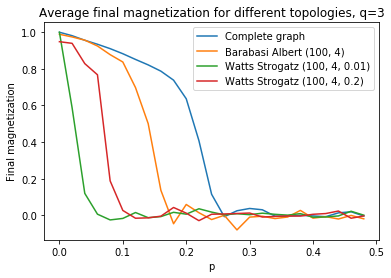

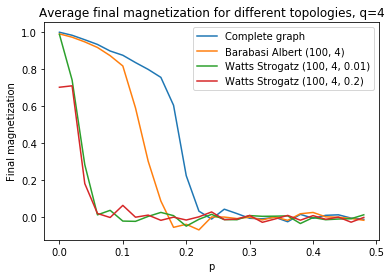

In [8]:
plt.subplots()
for q_index in range(len(qs)):
    for graph_index in range(len(graphs)):
        plt.plot(ps, final_magnetization[:, q_index, graph_index, :].mean(axis=1), label=graphs[graph_index])
    plt.title("Average final magnetization for different topologies, q={}".format(qs[q_index]))
    plt.xlabel('p')
    plt.ylabel('Final magnetization')
    plt.legend()
    plt.show()

We can see that varying **network topologies influence final magnetization**. The difference is clearly visible between complete graph, BA graph and WS graph. Varying WS graph's parameters doesn't seem to change the results very much.

### Average final magnetization for WS graph with different $q$

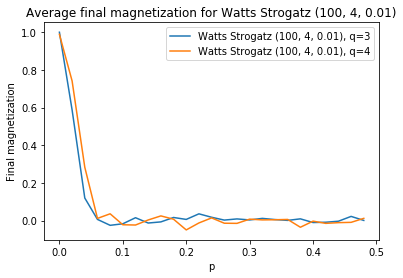

In [9]:
plt.subplots()
graph_index = 2
for q_index in range(len(qs)):
    plt.plot(ps, final_magnetization[:, q_index, graph_index, :].mean(axis=1),
             label="{}, q={}".format(graphs[graph_index], qs[q_index]))
    plt.title("Average final magnetization for {}".format(graphs[graph_index]))
    plt.xlabel('p')
    plt.ylabel('Final magnetization')
    plt.legend()
plt.show()

For varying $q$, we can see a difference in final magnetization for small values of $p$, nevertheless **overall difference is not significant**.